In [106]:
# Import packages
import numpy as np
curDay = 14

# Download input file
from download_inputs import download_inputs

download_inputs(curDay)

200


In [107]:
# Load input into workspace
filename = f'inputs\\day{curDay}.txt'
# curIn = np.loadtxt(filename)

inputFile = open(filename)
inputs = []
inputs = [s for s in inputFile.read().splitlines()]

print('Done loading input')

Done loading input


In [108]:
# Load test-input into workspace
filenameTest = f'inputs\\day{curDay}test.txt'

inputFileTest = open(filenameTest)
inputsTest = []
inputsTest = [s for s in inputFileTest.read().splitlines()]

print('Done loading test-input') 

Done loading test-input


In [177]:
maxH = 5000
maxW = 5000

curCave = np.zeros((maxH,maxW))

curInput = inputs
# curInput = inputsTest

for curI in curInput:
    curPoints = curI.split(' -> ')

    curX,curY = curPoints[0].split(',')
    curX = int(curX)
    curY = int(curY)
    for curP in curPoints[1:]:
        nextX,nextY = curP.split(',')
        nextX = int(nextX)
        nextY = int(nextY)
        # print(curX,curY,nextX,nextY)
        # Add values to cave
        if (curX == nextX):
            # print('y',curY,nextY)
            # print(np.sign(nextY-curY))
            curDir = np.sign(nextY-curY)
            changeY = curY 
            # Change starting point
            curCave[changeY,curX]  = 1

            while changeY != nextY:
                changeY += curDir
                # Change next point
                curCave[changeY,curX]  = 1
                # print(changeY)
            # for changeY in range(curY,nextY):
            #     print(changeY)
        if (curY == nextY):
            # print('x',curX,nextX)
            # TODO: Do the same for X
            # print(np.sign(nextY-curY))
            curDir = np.sign(nextX-curX)
            changeX = curX
            # Change starting point
            curCave[curY,changeX]  = 1

            while changeX != nextX:
                changeX += curDir
                # Change next point
                curCave[curY,changeX]  = 1
                # print(changeY)

        # Update current point
        curX = nextX
        curY = nextY

In [178]:
curCave[0:10,494:504]

ogCave = curCave.copy()
ogCave[0:10,494:504]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [179]:
# curCave[0:sY+10,0:sX+10]  
curCave[8,500] = 1
curCave[0:10,494:504]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [180]:
maxY = 0

maxY = np.where(curCave.sum(axis=1) != 0)[0][-1]

In [181]:
# curSand = [500,0]
curCave = ogCave.copy()

# maxSand = 30
# for i in range(maxSand):
sandCount = 0
flagSandInVoid = False 
while (flagSandInVoid == False):
    sandCount += 1
    sX = 500
    sY = 0

    # maxIter = 20
    # for i in range(maxIter):
    flagDoneGrain = False
    while (flagDoneGrain == False):

        # Check below
        if (curCave[sY+1,sX] == 0):
            # curCave[sY+1,sX] = 2
            sY += 1
        # Check diagonally down left
        elif (curCave[sY+1,sX-1] == 0):
            # curCave[sY+1,sX-1] = 2
            sY += 1
            sX += -1
        # Check diagonally down right
        elif (curCave[sY+1,sX+1] == 0):
            # curCave[sY+1,sX+1] = 2
            sY += 1
            sX += +1
        else:
            curCave[sY,sX] = 2
            flagDoneGrain = True 
            # print('Stopped at',sX,sY)
            # print(curCave[-10:sY+10,-10:sX+10])

        # Check exit-condition: Is the current grain "in the void", defined as below maxY 
        if sY > maxY:
            # print('In the void!')
            flagDoneGrain = True 
            flagSandInVoid = True
curCave[0:10,494:504]
p1 = sandCount-1
p1

873

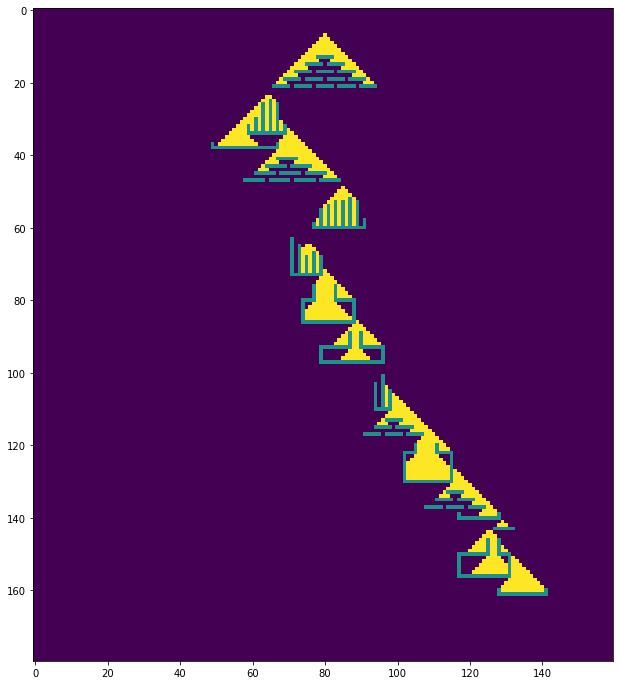

In [182]:
# ogCave[450:550,:20]
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,12))
dX = 80
# ax.imshow(curCave[:200,500-dX:500+dX],aspect='auto')
ax.imshow(curCave[:180,500-dX:500+dX],aspect='equal')

# Part 2

In [183]:

maxY = 0

maxY = np.where(ogCave.sum(axis=1) != 0)[0][-1] + 1

In [184]:
curCave = ogCave.copy()
sandCount = 0
flagSandInVoid = False 
while (flagSandInVoid == False):
# maxSand = 100
# for i in range(maxSand):
    sandCount += 1
    sX = 500
    sY = 0

    # maxIter = 20
    # for i in range(maxIter):
    flagDoneGrain = False
    while (flagDoneGrain == False):

        # Check below
        if (curCave[sY+1,sX] == 0):
            # curCave[sY+1,sX] = 2
            sY += 1
        # Check diagonally down left
        elif (curCave[sY+1,sX-1] == 0):
            # curCave[sY+1,sX-1] = 2
            sY += 1
            sX += -1
        # Check diagonally down right
        elif (curCave[sY+1,sX+1] == 0):
            # curCave[sY+1,sX+1] = 2
            sY += 1
            sX += +1
        else:
            curCave[sY,sX] = 2
            flagDoneGrain = True 
            # print('Stopped at',sX,sY)
            # print(curCave[-10:sY+10,-10:sX+10])

        # Check exit-condition: Is the current grain "in the void", defined as below maxY 
        if sY >= maxY:
            # print('In the void!')
            flagDoneGrain = True 
            # flagSandInVoid = True
            curCave[sY,sX] = 2

        # # Exit-condition, part 2: Is entrance blocked?
        if (sX == 500) & (sY == 0):
            flagDoneGrain = True
            flagSandInVoid = True 
curCave[0:10,494:504]
p2 = sandCount
p2

24813

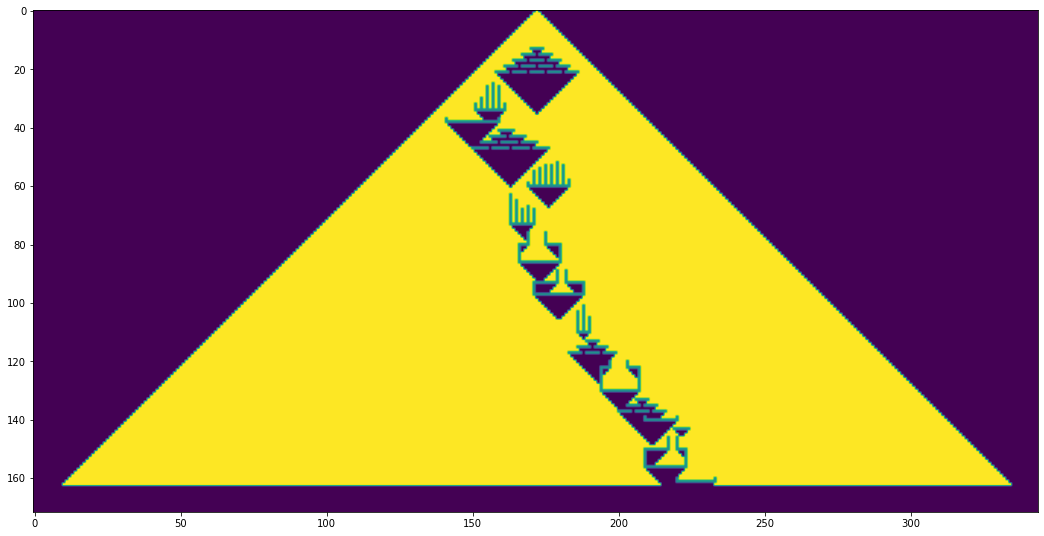

In [191]:

fig,ax = plt.subplots(figsize=(18,18))
dX = maxY+10
# ax.imshow(curCave[:200,500-dX:500+dX],aspect='auto')
ax.imshow(curCave[:maxY+10,500-dX:500+dX],aspect='equal')